In [1]:
import numpy as np
import pandas as pd
from library import portfolio

Importing MATLAB


In [138]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [136]:
def efficientFrontier( alloc, stockPool, stocks, vol, ti, tf):
    """
    remake of sharpe calculation following 
    https://www.mlq.ai/python-for-finance-portfolio-optimization/#h1sjvcte25p1r8or1e1ngd82h2r8ha1
    uses allocation percentage instead of weights
    """
    #print(np.shape(stockPool))

    # if np.sum(alloc[:-1])==0:
    #     print("all cash")
    #     return 0
    # else:
    Rp = 0
    var = 0
    Rf = 0.010 * alloc[-1] # cash return
    for i,j in enumerate(stocks): 
        stepReturn = 100*np.diff(stockPool[j][ti:tf])/stockPool[j][ti:tf-1]
        Rp += alloc[i]*np.mean(stepReturn)
        var += alloc[i]*alloc[i]*np.var(stepReturn)
    stdp = np.sqrt(var)
#     print(Rp , stdp)
    return Rp, stdp, (Rp-Rf)/stdp

def sharpe( alloc, stockPool, stocks, vol, ti, tf):
    """
    remake of sharpe calculation following 
    https://www.mlq.ai/python-for-finance-portfolio-optimization/#h1sjvcte25p1r8or1e1ngd82h2r8ha1
    uses allocation percentage instead of weights
    """
    #print(np.shape(stockPool))

    # if np.sum(alloc[:-1])==0:
    #     print("all cash")
    #     return 0
    # else:
    Rp = 0
    var = 0
    Rf = 0.010 * alloc[-1] # cash return
    for i,j in enumerate(stocks): 
        stepReturn = 100*np.diff(stockPool[j][ti:tf])/stockPool[j][ti:tf-1]
        Rp += alloc[i]*np.mean(stepReturn)
        var += alloc[i]*alloc[i]*np.var(stepReturn)
    stdp = np.sqrt(var)
#     print(Rp , stdp)
    return -(Rp-Rf)/stdp

In [77]:
portf = portfolio.portfolio('portf', 4, 100000, [1,6,7,15])

In [11]:
stockPool = np.loadtxt('./fbm/fbm100_2_14_2_5.txt')

In [78]:
a, b, c = efficientFrontier(list(portf.alloc.values()),stockPool, portf.stocks, portf.volume, 2400, 2900)

In [84]:
b

1471.1499744104356

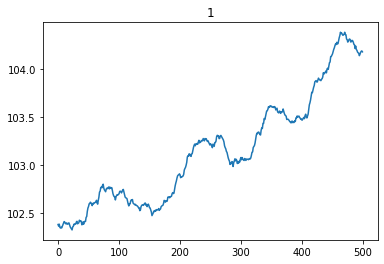

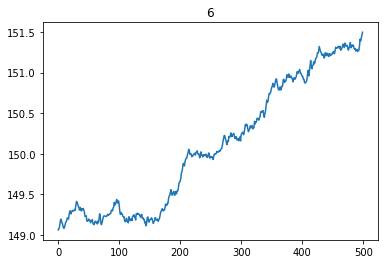

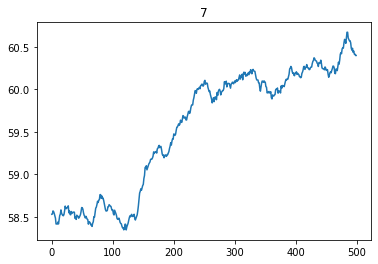

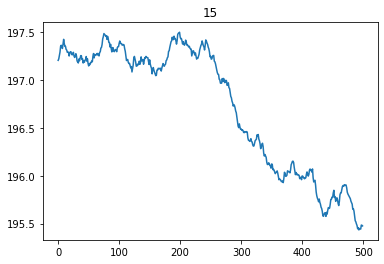

In [122]:
for i in portf.stocks:
    plt.plot(np.arange(500), stockPool[i][2400:2900])
    plt.title(str(i))
    plt.show()

In [20]:
a = np.random.random(6)
a /= a.sum()

In [148]:
returns = np.array([])
stdps = np.array([])
sharpes = np.array([])
for i in range(5000):
    alloc = np.random.random(5)
    alloc /= alloc.sum()
    r, s, c = efficientFrontier(alloc,stockPool, portf.stocks, portf.volume, 2400, 2900)
    returns = np.append(returns, r)
    stdps = np.append(stdps, s)
    sharpes = np.append(sharpes, c)
    

In [149]:
def check_sum(alloc):
    return np.sum(alloc)-1
cons = ({'type':'eq','fun':check_sum})

bounds = []
for i in range(len(portf.stocks)+1):
    bounds.append((0,1))

opt= (minimize(sharpe, 
              list(portf.alloc.values()), 
              args=(stockPool,portf.stocks,portf.volume,2400,2900), 
              method='SLSQP', 
              bounds=bounds,
              constraints=cons)['x'])

In [150]:
r, s, c = efficientFrontier(opt, stockPool, portf.stocks, portf.volume, 2400, 2900)

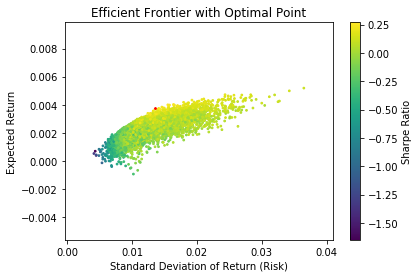

In [157]:
plt.scatter(stdps, returns, c = (sharpes), s = 3)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(s,r, c = 'red', s = 3)
plt.xlabel("Standard Deviation of Return (Risk)")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier with Optimal Point")
# plt.grid(True)
plt.savefig("efficientfrontier.png",bbox_inches='tight', dpi=250)

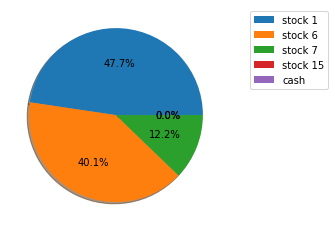

In [183]:
plt.pie(opt, labels=['stock 1', 'stock 6', 'stock 7', 'stock 15', 'cash'], shadow=True, labeldistance=None, autopct = '%1.1f%%')
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))


In [176]:
def stockCov(portf,TstockPool):
    """
    """
#     tmax = 2900#portf.valuedata.time.max()+1
#     tmin = 2400#portf.valuedata.time.min()
    stocks = portf.stocks
    labels = [str(i) for i in stocks]
    print(labels)
    cov = np.corrcoef(TstockPool[stocks])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cov, interpolation='nearest')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(stocks)))
    ax.set_yticks(np.arange(len(stocks)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title("Portf ID: " + str(portf.portfID) +" | Pearson Correlation Coefficient", pad=10)

['1', '6', '7', '15']


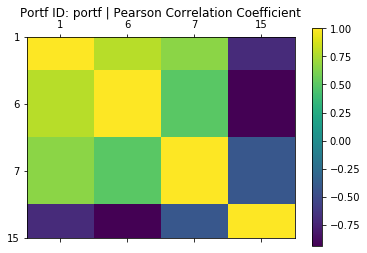

In [184]:
stockCov(portf, stockPool)

In [182]:
opt

array([4.76502094e-01, 4.01459337e-01, 1.22038569e-01, 0.00000000e+00,
       1.48752538e-16])

In [192]:
from fbm import fbmlib

In [205]:
low = fbmlib.fbm(0.2,2**8,1)
high = fbmlib.fbm(0.8,2**8,1)
mid = fbmlib.fbm(0.5,2**8,1)

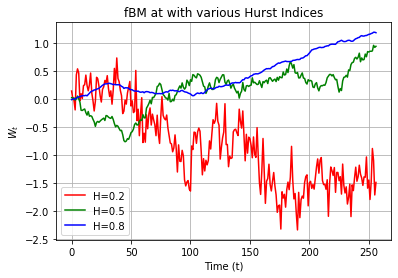

In [211]:
plt.plot(np.arange(2**8+1),low,label='H=0.2', color='red')
plt.plot(np.arange(2**8+1),mid, label = 'H=0.5', color = 'green')
plt.plot(np.arange(2**8+1),high, label = 'H=0.8', color = 'blue')
plt.legend()
plt.title("fBM at with various Hurst Indices")
plt.xlabel("Time (t)")
plt.grid(True)
plt.ylabel("$W_t$")
plt.savefig("./csgpres/fbm.png", dpi=250)

In [212]:
stockPool = np.load('./results/2-4/stockPool_501_1000_100_new2threshold_fixedhurst.npy')
hurstPool = np.load('./results/2-4/hurstPool_501_1000_100_new2threshold_fixedhurst.npy')

In [225]:
totalOrders = pd.read_csv("./results/2-4/totalOrders_501_1000_100_new2threshold_fixedhurst.csv")

In [227]:
orders50 = totalOrders[totalOrders['stock']==50]

In [234]:
orders50[orders50['time']==993]['order']

3       1.0
120     1.0
121     3.0
300     1.0
317     1.0
418     1.0
463     1.0
502     6.0
539     3.0
625     1.0
660     5.0
785     4.0
873     2.0
940     3.0
976     1.0
1008    1.0
Name: order, dtype: float64

In [240]:
vol = np.array([])
time = np.arange(1000)
for i in range(993,1993):
    vol = np.append(vol,orders50[orders50['time']==i]['order'].sum())

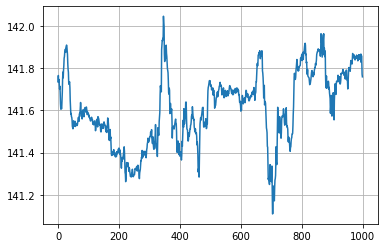

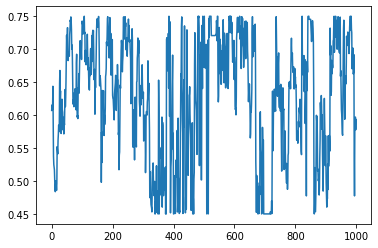

/Users/braedyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


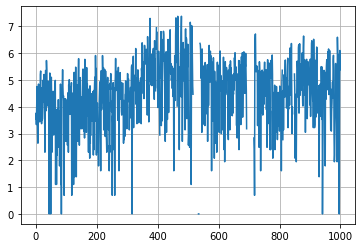

In [247]:
i = 50
plt.plot(np.arange(len(stockPool[i][992:1992])),stockPool[i][992:1992])
plt.grid(True)
plt.show()
plt.plot(np.arange(len(hurstPool[i][992:1992])),hurstPool[i][992:1992])
plt.show()
plt.plot(time,np.log(abs(vol)))
plt.grid(True)
# plt.yscale('log')

In [254]:
np.std(stockPool[i][992:1500])

0.14935012590774258

In [258]:
from library.utils import cosineSimP
import pickle

In [259]:
with open('./results/2-4/traderIDs_501_1000_100_new2threshold_fixedhurst.pkl','rb') as f:
    traderIDs = pickle.load(f)

In [262]:
mat = np.zeros((501,501))
cosins = {}
for t in range(993,994):
    mat2 = np.zeros((501,501))
    x = 0
    y = 0
    for i, portf1 in traderIDs.items():
        y=0
        for j, portf2 in traderIDs.items():
            csmp = cosineSimP(t,portf1,portf2)
            mat2[x,y] = csmp
            y += 1
        x += 1
        print(i)
    mat = np.dstack((mat,mat2))
    cosins[str(t)] = np.mean(mat2)
    print(np.mean(mat2))
    print(t)

xjche
vhmjb
mlexq
nzcah
rfbjh
nkhtc
meruq
zlcnw
kfqyp
nowym
ryeqx
yafio
ircqy
riolx
nothl
hbaxj
flnzd
zpnkq
jsmhi
ynpsi
tsgrd
uvprs
fuyac
belxj
jmluq
glqzk
ehawc
itwhc
tuarh
xpeib
qydpu
bvkrj
vurzn
sjtoi
mrpsv
jaulf
aupmo
qckln
cnmdx
ycgrt
smhgn
midxn
hfgir
qioms
knvpr
abfci
ocluh
kfgpj
zfbou
yznig
vwsck
bxlgy
xaqkr
txfza
oiwrj
whplm
lbopm
bugcz
vouri
kwyar
yxfad
jayqm
zydrx
imefp
bylkj
emkas
ypujt
xezgp
sirxw
lpzax
vqado
ndofj
iknbz
eydqg
dbfim
ehigx
bjuez
pxtjl
mvrzy
copjx
webcj
beodk
nkjfm
dmeyv
jsvke
eylvf
obaid
goqrd
yzgox
tgwux
jhusf
feymz
xgkpo
fxcpa
qhvea
npyzt
aubhf
jbtxa
idbtx
becki
gmurs
mrley
qaplt
flwmz
yeimf
pneao
qljnc
nwxru
qblhr
byhmn
yfcmt
fvyew
uvypl
cptlg
onmlz
ixren
iwjuo
vntkf
kwmst
edfmi
gjxku
dovzp
pybsd
wshpf
kqtpz
frjoy
ntrym
tjlwu
imvlq
eugjo
mplji
alfgq
xuclf
qhmjx
suzly
dsqlv
vcfso
tmyrq
qaxmj
krnsj
zvulm
fhdse
qbjis
pztgk
otvry
ynopv
nbcwv
ovrys
uxtkh
ayzsi
vzyue
gozdx
ntfip
pqlro
ndtjx
sienm
davif
xryeh
zmund
rmbcn
erogh
oijep
jhgxw
tfwjx
lgpvn
kmnbr
vgei

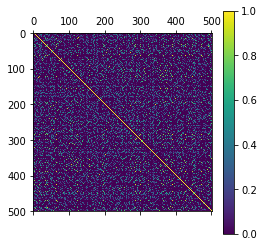

In [273]:
plt.matshow(mat2)
plt.colorbar()

/Users/braedyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


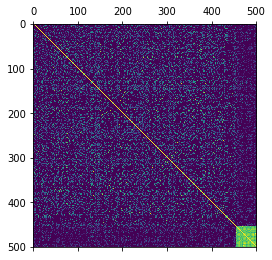

In [271]:
import hdbscan

clusterer = hdbscan.HDBSCAN()

clusterer.fit(mat2)
sortIndices = np.argsort(clusterer.labels_)
plt.matshow(mat2[[sortIndices]][:,sortIndices])


In [272]:
mat2

array([[1.        , 0.12034846, 0.        , ..., 0.        , 0.        ,
        0.42750428],
       [0.12034846, 1.        , 0.4681444 , ..., 0.0056052 , 0.        ,
        0.        ],
       [0.        , 0.4681444 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.0056052 , 0.        , ..., 1.        , 0.39158936,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.39158936, 1.        ,
        0.14222246],
       [0.42750428, 0.        , 0.        , ..., 0.        , 0.14222246,
        1.        ]])

In [278]:
totalOrders['time'] = totalOrders['time']-992

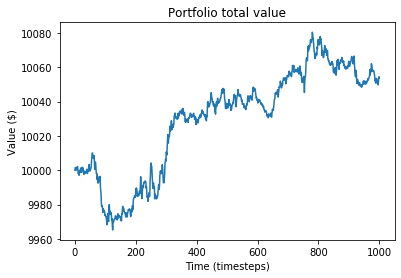

In [304]:
plt.plot(np.arange(1001),traderIDs['xjche'].value)
plt.title("Portfolio total value")
plt.xlabel("Time (timesteps)")
plt.ylabel("Value ($)")
plt.savefig("./csgpres/portfvalue.png", dpi=250)

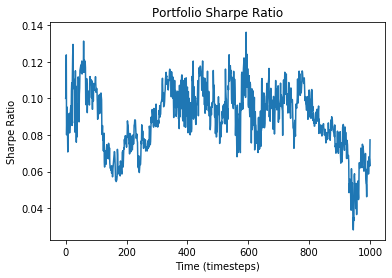

In [303]:
plt.plot(np.arange(1001),traderIDs['xjche'].sharpeReal)
plt.title("Portfolio Sharpe Ratio")
plt.xlabel("Time (timesteps)")
plt.ylabel("Sharpe Ratio")
plt.savefig("./csgpres/portfsharpe.png", dpi=250)

In [295]:
traderIDs['xjche'].weightdata['time'] = traderIDs['xjche'].weightdata['time'] - 991

In [296]:
traderIDs['xjche'].weightdata

,ID,time,stock,weight
0,xjche,1,0,0.0
0,xjche,1,1,18.0
0,xjche,1,2,29.0
0,xjche,1,3,0.0
0,xjche,1,4,3.0
...,...,...,...,...
0,xjche,1000,6,18.0
0,xjche,1000,7,26.0
0,xjche,1000,8,23.0
0,xjche,1000,9,0.0


In [297]:
def weightSharpeAvg(portf,TstockChars,TstockPool):
    """
    """
    tmax = portf.valuedata.time.max()+1
    tmin = portf.valuedata.time.min()
    stocks = portf.stocks
                
    for s in stocks:
        weight = portf.weightdata
        alloc = np.asarray(weight[weight.stock==s]['weight'])*TstockPool[s,tmin:tmax]/np.asarray(portf.valuedata['value'])
        stockchars = TstockChars[TstockChars['stock']==s]
        var = np.mean(np.asarray(stockchars[stockchars['time']<=tmax]['var']))
        mean = np.mean(np.asarray(stockchars[stockchars['time']<=tmax]['mean']))
        std = np.mean(np.asarray(stockchars[stockchars['time']<=tmax]['std']))
        plt.plot(np.mean(mean/std), np.mean(alloc), 'o',label=s)

    # include cash
#     cashalloc = portf.valuedata[portf.valuedata.time==t].cash[0]/portf.valuedata[portf.valuedata.time==t].value[0]
#     cashvar = 0

#     plt.plot(cashvar, ocashalloc, 'o', color='lightgreen')
#     plt.plot(cashvar, cashalloc, 'o', color='green', label='Cash')

    plt.grid(True)
#     plt.xlim(right=maxvar, left=0)
#     plt.ylim(top=maxalloc,bottom=0)
    plt.xlabel("Stock Mean Return/Std")
    plt.ylabel("Weight Allocation")
    plt.legend()
    plt.title("Portf ID: " + str(portf.portfID) +" | Average")

In [298]:
from library.utils import characterize
stockChars = characterize(stockPool, tmax = 1992, window=500)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a47d97da0>]],
      dtype=object)

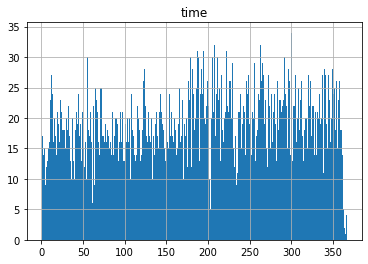

In [321]:
totalOrders[totalOrders['stock']==2].hist(column='time', bins = 366)

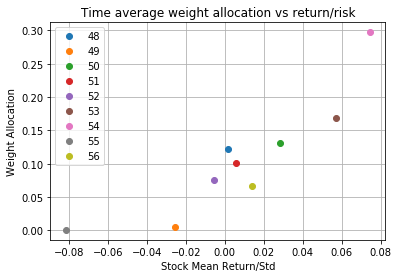

In [313]:
weightSharpeAvg(traderIDs['meruq'], stockChars, stockPool)
plt.title("Time average weight allocation vs return/risk")
plt.savefig('./csgpres/portfweightalloc.png', dpi = 250)

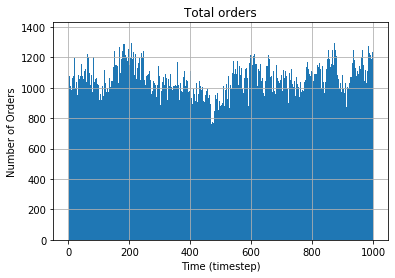

In [318]:
totalOrders.hist(column='time', bins = 1000)
plt.title("Total orders")
plt.xlabel("Time (timestep)")
plt.ylabel("Number of Orders")
plt.savefig("./csgpres/totalordershist.png", dpi=250)

In [390]:
def findPortfCascades(totalOrders, minAct = 1000):
    """
    works on Transactions table
    """
    if len(totalOrders) > 0:
        ToS = totalOrders['time'].unique()
        tmin = totalOrders['time'].min()
        tmax = totalOrders['time'].max()
        cascades = {}
        keySep = np.array([])
        for i,t in enumerate(range(tmin,tmax+1)):
            nportfs = len(totalOrders[totalOrders['time']==t])
            if nportfs <= minAct and i != 0:
                keySep = np.append(keySep, int(t))

        i0 = 0
        for n, key in enumerate(keySep):
            key += 1
#             print(i0,key)
            bot = totalOrders[totalOrders['time']>i0]
            top = bot[bot['time']<=key]
            cascades[n] = top
            i0=key
        return cascades
    else:
        return []
    
def findstockCascades(stockOrders, minAct = 35):
    """
    works on Transactions table
    """
    if len(stockOrders) > 0:
        ToS = stockOrders['time'].unique()
        tmin = stockOrders['time'].min()
        tmax = stockOrders['time'].max()
        cascades = {}
        keySep = np.array([])
        for i,t in enumerate(range(tmin,tmax+1)):
            nportfs = len(stockOrders[stockOrders['time']==t])
            if nportfs <= minAct and i != 0:
                keySep = np.append(keySep, int(t))

        i0 = 0
        for n, key in enumerate(keySep):
            key += 1
#             print(i0,key)
            bot = stockOrders[stockOrders['time']>i0]
            top = bot[bot['time']<=key]
            cascades[n] = top
            i0=key
        return cascades
    else:
        return []

In [362]:
cascades = findPortfCascades(totalOrders)

In [365]:
sizes = np.array([])
nrows = np.array([])
numCascade = len(cascades)
for i in range(numCascade):
    if cascades[i]['time'].min() > 1 and cascades[i]['time'].max() < 1000:
        casc = cascades[i]
        size = 0
        for row in range(len(casc)):
            time = int(casc.iloc[row]['time']) +991
            stock = int(casc.iloc[row]['stock'])
            volume = int(casc.iloc[row]['order'])
            size += stockPool[stock][time]*abs(volume)
        sizes = np.append(sizes, size)
        nrows = np.append(nrows, len(casc))
    else:
        print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))

passed cascade 0 of size 3032


In [378]:
durs = np.array([])
for i in range(numCascade):
    if cascades[i]['time'].min() > 1 and cascades[i]['time'].max() < 1000:
        casc = cascades[i]
        dur = casc['time'].max() - casc['time'].min()
        if dur == 0:
            dur = 1
        durs = np.append(durs,dur)
        

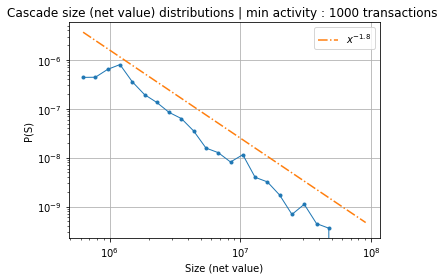

In [376]:
hist, bins = np.histogram(sizes, bins=np.logspace(np.log10(min(sizes)),np.log10(max(sizes)), 25))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
plt.plot(mid,np.divide(hist,binsize)/len(sizes),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.8)*100000, '-.', label= "$x^{-1.8}$")
plt.loglog()
plt.legend()
plt.title("Cascade size (net value) distributions | min activity : 1000 transactions ")
plt.ylabel('P(S)')
plt.xlabel('Size (net value)')
plt.grid(True)
plt.tight_layout()
plt.savefig("./csgpres/globalcascvalue.png", dpi=250)
plt.show()


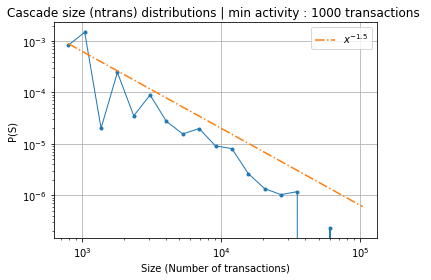

In [375]:
hist, bins = np.histogram(nrows, bins=np.logspace(np.log10(min(nrows)),np.log10(max(nrows)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.5)*20, '-.', label= "$x^{-1.5}$")
plt.loglog()
plt.legend()
plt.title("Cascade size (ntrans) distributions | min activity : 1000 transactions ")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.tight_layout()
plt.savefig("./csgpres/globalcascnrows.png", dpi=250)
plt.show()
plt.close()

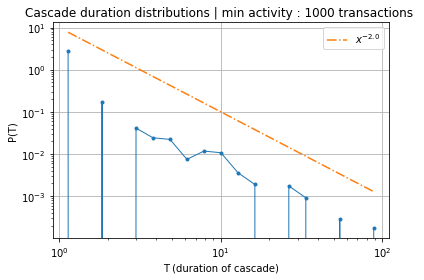

In [383]:
hist, bins = np.histogram(durs, bins=np.logspace(np.log10(min(durs)),np.log10(max(durs)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(durs),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-2)*10, '-.', label= "$x^{-2.0}$")
plt.loglog()
plt.legend()
plt.title("Cascade duration distributions | min activity : 1000 transactions ")
plt.ylabel('P(T)')
plt.xlabel('T (duration of cascade)')
plt.grid(True)
plt.tight_layout()
plt.savefig("./csgpres/globalcascduration.png", dpi=250)
plt.show()
plt.close()

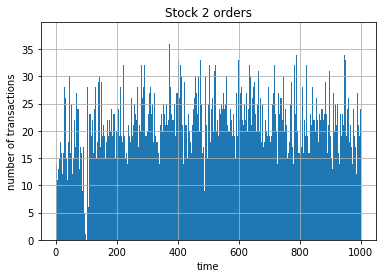

In [437]:
totalOrders[totalOrders['stock']==6].hist(column='time', bins=1000)
plt.title("Stock 2 orders")
plt.xlabel("time")
plt.ylabel("number of transactions")
plt.savefig("./csgpres/stockcaschist.png",dpi=250)

In [438]:
cascades = findstockCascades(totalOrders[totalOrders['stock']==6], 20)

In [439]:
sizes = np.array([])
nrows = np.array([])
durs = np.array([])
numCascade = len(cascades)
for i in range(numCascade):
    if cascades[i]['time'].min() > 1 and cascades[i]['time'].max() < 1000:
        casc = cascades[i]
        size = 0
        for row in range(len(casc)):
            time = int(casc.iloc[row]['time']) +991
            stock = int(casc.iloc[row]['stock'])
            volume = int(casc.iloc[row]['order'])
            size += stockPool[stock][time]*abs(volume)
        sizes = np.append(sizes, size)
        nrows = np.append(nrows, len(casc))
        dur = casc['time'].max() - casc['time'].min()
        if dur == 0:
            dur = 1
        durs = np.append(durs,dur)
    else:
        print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))

passed cascade 0 of size 53
passed cascade 60 of size 0
passed cascade 63 of size 0
passed cascade 64 of size 0


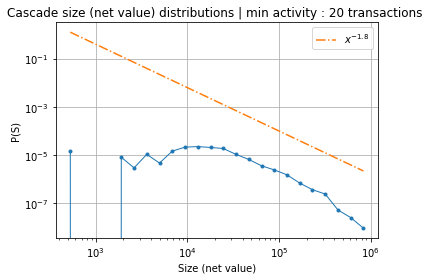

In [442]:
hist, bins = np.histogram(sizes, bins=np.logspace(np.log10(min(sizes)),np.log10(max(sizes)), 25))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)
    
plt.plot(mid,np.divide(hist,binsize)/len(sizes),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.8)*100000, '-.', label= "$x^{-1.8}$")
plt.loglog()
plt.legend()
plt.title("Cascade size (net value) distributions | min activity : 20 transactions ")
plt.ylabel('P(S)')
plt.xlabel('Size (net value)')
plt.grid(True)
plt.tight_layout()
plt.savefig("./csgpres/stockcascvalue.png", dpi=250)
plt.show()



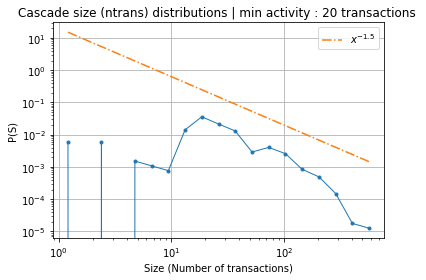

In [443]:
hist, bins = np.histogram(nrows, bins=np.logspace(np.log10(min(nrows)),np.log10(max(nrows)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.5)*20, '-.', label= "$x^{-1.5}$")
plt.loglog()
plt.legend()
plt.title("Cascade size (ntrans) distributions | min activity : 20 transactions ")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.tight_layout()
plt.savefig("./csgpres/stockcascnrows.png", dpi=250)
plt.show()
plt.close()

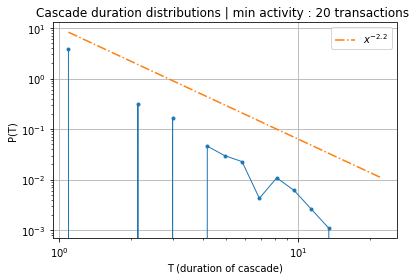

In [446]:
hist, bins = np.histogram(durs, bins=np.logspace(np.log10(min(durs)),np.log10(max(durs)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(durs),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-2.2)*10, '-.', label= "$x^{-2.2}$")
plt.loglog()
plt.legend()
plt.title("Cascade duration distributions | min activity : 20 transactions ")
plt.ylabel('P(T)')
plt.xlabel('T (duration of cascade)')
plt.grid(True)
plt.tight_layout()
plt.savefig("./csgpres/stockcascduration.png", dpi=250)
plt.show()
plt.close()